# ニューラルネットワークの基礎
参考図書：ゼロから作るDeep Learning  
このノートでは、参考書の第3章まで、すなわちニューラルネットワークの基礎的な動作原理と、学習済みネットワークを用いた分類の実験までを行う。

## パーセプトロン

In [15]:
# ANDゲートの実装
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7 # この重みと閾値は条件を満たしていれば何でもいい。例えばの話
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [7]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


In [10]:
import numpy as np
x = np.array([0, 1]) # 入力
w = np.array([0.5, 0.5]) # 重み
b = -0.7
w*x

array([0. , 0.5])

In [11]:
np.sum(w*x) # これで内積みたいなのが出る

0.5

In [12]:
np.sum(w*x) + b # これがtmp

-0.19999999999999996

In [13]:
# ANDの再定義
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [17]:
# NANDゲートの実装
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7 # 重みとバイアスはANDの符号反転に過ぎない
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
# ORゲートの実装
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2 # 重みとバイアスはANDの符号反転に過ぎない
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [18]:
# XORゲートの実装
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print(XOR(0,0))
print(XOR(1,0))
print(XOR(0,1))
print(XOR(1,1))

0
1
1
0


上で実装したのはXORゲートを実装するための2層パーセプトロン  
単層であったNAND, OR, AND用のパーセプトロンの組み合わせで実現

## ニューラルネットワーク

入力層、中間層、出力層で構成されるもの

### 活性化関数

In [20]:
# ステップ関数の定義
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [23]:
# Numpy配列に対応した実装に修正
def step_function(x):
    y = x > 0
    return y.astype(np.int)


# astypeの意味
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x > 0
print(y)
y = y.astype(np.int) # 各要素の型をbooleanからint型へ変換
print(y)

[-1.  1.  2.]
[False  True  True]
[0 1 1]


In [25]:
# シグモイド関数の実装
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [26]:
# 引数のxにNumPy配列を入力しても、結果は各要素ごとに正しく計算されることに注意
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

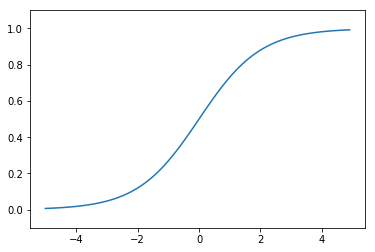

In [28]:
import matplotlib.pylab as plt


# シグモイド関数をグラフに描画
x = np.arange(-5.0, 5.0, 0.1) # -5.0から5.0までの範囲を0.1刻みでNumPy配列を生成
y = sigmoid(x) # NumPy配列の各要素ごとにきちんと計算されるから、これもNumPy配列
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.show()

重要：Sigmoidもステップ関数も、非線形  
活性化関数に線形関数を用いてはならない（or 意味がない）  
線形関数では、積は一層にまとめることが可能、すなわち多層にすることの利点を活かすことができない

### 多次元配列の扱い

In [31]:
# 1次元の配列
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [34]:
# 2次元の配列
B = np.array([[1,2],[3,4],[5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [35]:
# 行列のドット積
A = np.array([[1,2,3], [4,5,6]])
print(A)
B = np.array([[1,2], [3,4], [5,6]])
print(B)
np.dot(A, B)

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]


array([[22, 28],
       [49, 64]])

### ニューラルネットワークの行列の積

In [38]:
# バイアスと活性化関数は省略し、重みだけがあるものとする
X = np.array([1,2])
W = np.array([[1,3,5], [2,4,6]])
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


NumPyのドット積を使えば、Yの結果を一度に計算することができる！

### 三層ニューラルネットワークの実装

上の括弧付き添え字は層の番号を（入力層を0層とする）、下の添え字は層内での番号を表す。  
重みwについては、下添え字の左側が前層のニューロン番号、右側が次層のニューロン番号を表す
  
$$ a^{(1)}_1 = w^{(1)}_{11}x_1 + w^{(1)}_{12}x_2 + b^{(1)}_1 $$

1層目の「重み付き和」は行列を用いて次の式で表せる。  
  
$$ \bf{A}^{(1)} = \bf{XW}^{(1)} + \bf{B}^{(1)} $$

In [42]:
# 入力信号、重み、バイアスは適当な値
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

# 隠れ層での重み付き和（バイアスと重み付き信号の総和）
A1 = np.dot(X, W1) + B1
print(A1)
# 活性化関数で変換された信号をzで表す
Z1 = sigmoid(A1)
print(Z1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [43]:
# 第一層から第二層目までの実装
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
print(A2)
Z2 = sigmoid(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [45]:
# 第二層目から出力層への実装

# 活性化関数を最後だけ変える => 恒等関数へ
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # もしくは Y = A3
print(Y)

[0.31682708 0.69627909]


In [47]:
# 関数を定義して綺麗にまとめるとこうなる
def init_network():
    network = {} # 辞書型
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    z3 = sigmoid(a3)
    y = identity_function(a3)
    
    return y


network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


### 出力層の設計

ニューラルネットワークは、分類問題と回帰問題の両方に用いることができる  
出力層の活性化関数は一般に以下のように用いられる。

回帰問題：恒等関数  
分類問題：ソフトマックス関数  

In [48]:
# ソフトマックス関数の定義
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

a = np.array([0.3, 2.9, 4.0])
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

このままの定義ではオーバーフローの問題がある。  
＝指数関数が非常に大きな値になると無限大を表すinfを返してしまうこと   
そこで入力信号の最大値を引くことで解決する

In [51]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


ソフトマックス関数の出力は、0から1.0の間の実数になる  
また、出力の総和は1になる  
この性質のおかげで、ソフトマックス関数の出力を「確率」として解釈可能

### 手書き数字認識

学習はすでに完了したとして、学習済みのパラメータを用いて、ニューラルネットワークの「推論処理」のみを実装していく  
この推論処理は、ニューラルネットワークの順方向伝播（forward propagation）と言われる

使用するデータセット  
* MNIST: 手書き数字の画像セット
* 0から9までの数字画像から構成される
* 訓練画像が6万枚、テスト画像が1万枚
* 画像データは28×28のグレー画像、各ピクセルは0から255までの値をとる
* それぞれの画像データに対しては、「7」「2」「1」といった対応ラベルが与えられている

In [3]:
# datasetディレクトリに存在するmnist.pyを用いて、MNISTデータをインターネットから読み込む
import sys, os
sys.path.append(os.pardir) # 親ディレクトリのファイルをインポートするための設定
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# それぞれのデータの形状を出力
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


**load_mnist関数に関する補足**  
* 「（訓練画像、訓練ラベル）,（テスト画像、テストラベル）」の形式で読み込んだMNISTデータを返す
* normalizeの引数は、入力画像を0.0~1.0の値に正規化するかどうかを設定
* flattenは入力画像を平らにする（1次元配列にする）かどうかを設定  
    * Trueにすると784個の要素からなる1次元配列として格納
    * Falseにすると1×28×28の3次元配列として格納

In [6]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img)) # NumPyとして格納された画像データをPIL用のデータオブジェクトに変換
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False) 
# flatten=Trueに注意、1次元配列として画像は格納されている

img = x_train[0]
label = t_train[0]
print(label)  # 5、すなわち正解の数字

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形
print(img.shape)  # (28, 28)

img_show(img)

5
(784,)
(28, 28)


### MNISTデータセットに対し、推論処理を行うNeural Networkを実装

* ネットワークは、入力層を784層、出力層を10層のニューロンで構成
    * 入力層の784は、画像サイズの28×28＝784から
    * 出力層の10は、10クラス分類（数字の0から9の10クラス）
* 隠れ層は2つ
    * 一つ目の隠れ層が50個、二つ目の層が100個のニューロンを持つ
    * これらの数は任意に設定可能

3つの関数を定義

In [17]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


# ここで学習済みネットワークを読み込み
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3) # 出力層はsoftmax関数で確率表現したことを思い出そう

    return y

In [19]:
x, t = get_data() # データセットの取得
network = init_network() # ネットワーク生成
accuracy_cnt = 0
# print(len(x)) # 10000
for i in range(len(x)): # 画像データを1枚ずつ取り出しfor文にかける、つまり10000枚分
    y = predict(network, x[i]) # 各ラベルの確率をNumPy配列として出力する関数
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得し、それを予測結果とする
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### バッチ処理による高速化
配列でまとめて処理を行うこと。for文で下手に回すよりも高速

In [23]:
# バッチ処理によるコード改善
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数（100の約数なら任意に変更可、もちろん一気にやったほうが早い）
accuracy_cnt = 0

for i in range(0, len(x), batch_size): # すなわち今回はバッチの数＝データ総数なので一気に一回で回している。for文とはいえ処理は一回
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
